# Debugging bench

In [6]:
!make

make: Nothing to be done for 'all'.


In [9]:
import os
import sys
import numpy as np
sys.path.insert(0, os.path.abspath("../include"))
import subprocess
import json
import py_helper

%matplotlib widget

defines=py_helper.load_defines("mat_size.hpp")

NCOLS_A = defines["NCOLS_A"]
NROWS_C = defines["NROWS_C"]
NCOLS_C = defines["NCOLS_C"]

# A is of size (NROWS_C, NCOLS_A)
# B is of size (NCOLS_A, NCOLS_C)    
# C is of size (NROWS_C, NCOLS_C)

mat_mul_double=py_helper.MatMul(NCOLS_A, NROWS_C, NCOLS_C, np.float64)
mat_mul_float=py_helper.MatMul(NCOLS_A, NROWS_C, NCOLS_C, np.float32)

# Make up objects for timing results and local optimisation
timings=py_helper.TimingResults()

Device id: 0
	name:                                    
	global memory size:                      536 MB
	available registers per block:           65536 
	maximum shared memory size per block:    65 KB
	maximum pitch size for memory copies:    402 MB
	max block size:                          (1024,1024,1024)
	max threads in a block:                  1024
	max Grid size:                           (2147483647,2147483647,2147483647)
Time for kernel was 6.844 ms
Maximum error (infinity norm) is: 0.000427246


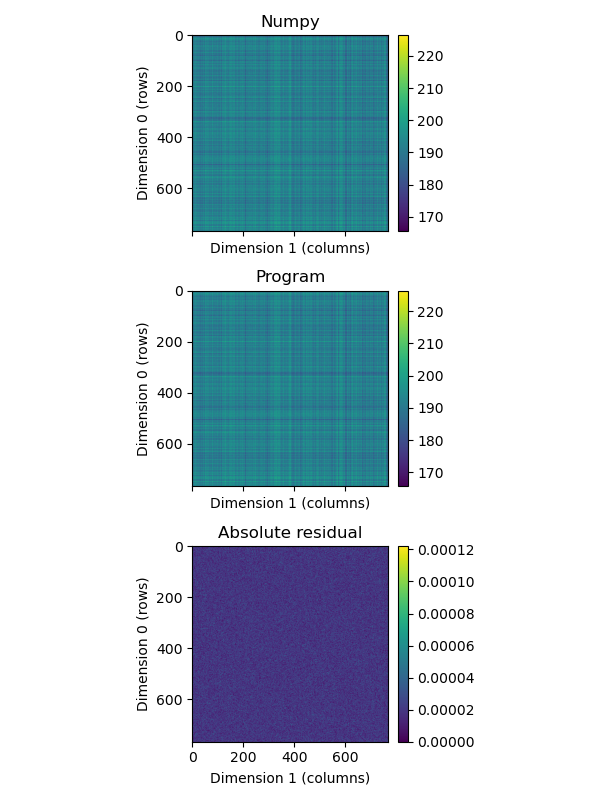

In [11]:
#local_opt=py_helper.LocalOpt(cmds=["./mat_mult_local_A.exe", "-cpu", "0"])
subprocess.run(["./mat_mult_tile_shared_B_vector.exe"])

mat_mul_float.load_data()
mat_mul_float.check_data()